# Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv('final.csv')

# Dataset Visualization

In [3]:
df.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,4b65dfadb1742b415136d191973da00d,42,385,3,58,24,0,0,0,Yes,...,0,4,18,0,2,1,87,87,66,Yes
1,3dc4e0a208acbfd793d585d61e4da5cd,85,180,1,77,0,0,0,0,No,...,0,0,0,0,0,0,17,17,3,Yes
2,23e106637070d37b8d8e1b681fdb54df,37,279,6,50,12,0,0,0,Yes,...,0,16,0,0,1,0,48,49,39,No
3,928fddf2335bb4d1211357b0c5abfad8,295,311,12,349,12,0,0,0,Yes,...,0,12,1,1,1,1,172,174,414,No
4,3d95d975bb58268c5664bd05166d14db,102,180,2,24,0,0,0,-1,unclear,...,1,0,1,0,0,0,10,10,4,Yes


In [4]:
# Check for same PDFs

print(len(df))
print(len(df['MD5']))

210339
210339


In [5]:
temp = df.copy()

In [6]:
print(len(temp))
print(len(temp['MD5'].unique()))

210339
124499


In [7]:
temp = temp.drop_duplicates(subset=['MD5'])
temp = temp.drop(columns=['MD5'])

In [8]:
print(len(temp[temp['Malicious'] == 'Yes']))
print(len(temp[temp['Malicious'] == 'No']))

68116
56383


In [9]:
temp.drop(columns=['pdfsize'])

,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,obj,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,385,3,58,24,0,0,0,Yes,%PDF-1.4,59,...,0,4,18,0,2,1,87,87,66,Yes
1,180,1,77,0,0,0,0,No,%PDF-1.6,9,...,0,0,0,0,0,0,17,17,3,Yes
2,279,6,50,12,0,0,0,Yes,%PDF-1.2,49,...,0,16,0,0,1,0,48,49,39,No
3,311,12,349,12,0,0,0,Yes,%PDF-1.4,91,...,0,12,1,1,1,1,172,174,414,No
4,180,2,24,0,0,0,-1,unclear,%PDF-1.6,8,...,1,0,1,0,0,0,10,10,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210326,180,1,77,0,0,0,0,No,%PDF-1.6,9,...,0,0,0,0,0,0,17,17,3,Yes
210328,6811,1,53,9,0,0,0,No,%PDF-1.6,27,...,1,2,1,0,2,0,40,45,14,Yes
210331,421,2,62,36,0,0,0,Yes,%PDF-1.4,63,...,0,4,23,0,2,1,91,91,59,Yes
210332,303,8,1807,5,0,0,0,Yes,%PDF-1.4,59,...,0,8,0,1,1,1,92,89,106,No


In [10]:
# Removing duplicates

print(len(temp))
temp = temp.drop_duplicates()
print(len(temp))

124499
93011


In [11]:
print(len(temp[temp['Malicious'] == 'Yes']))
print(len(temp[temp['Malicious'] == 'No']))

36862
56149


In [12]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', 'header',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       '%EOF', '/Producer', '/ProcSet', '/ID', '/S', '/CreationDate', '/Font',
       '/XObject', '/Widget', '/FontDescriptor', '/Rect', '/ModDate', '/Info',
       '/XML', 'dict_start', 'dict_end', 'comments', 'Malicious'],
      dtype='object')

## Analysis of isEncrypted Column

In [13]:
temp['isEncrypted'].value_counts()

isEncrypted
 0    90671
 1     2336
-1        4
Name: count, dtype: int64

In [14]:
temp[temp['Malicious'] == 'Yes']['isEncrypted'].value_counts()

isEncrypted
 0    36772
 1       87
-1        3
Name: count, dtype: int64

In [15]:
temp[temp['Malicious'] == 'No']['isEncrypted'].value_counts()

isEncrypted
 0    53899
 1     2249
-1        1
Name: count, dtype: int64

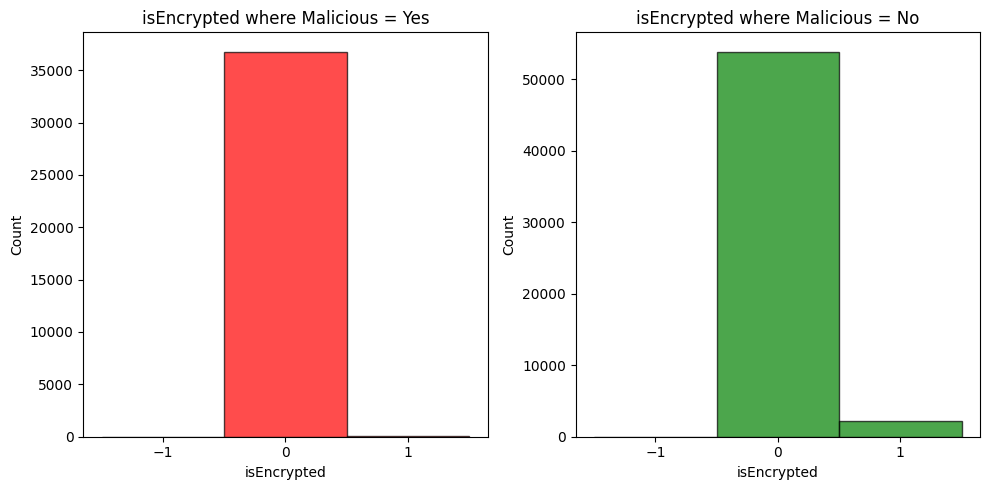

In [16]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['isEncrypted']
malicious_no = temp[temp['Malicious'] == 'No']['isEncrypted']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(malicious_yes, bins=[-1.5, -0.5, 0.5, 1.5], color='red', edgecolor='black', alpha=0.7)
ax1.set_title('isEncrypted where Malicious = Yes')
ax1.set_xlabel('isEncrypted')
ax1.set_ylabel('Count')
ax1.set_xticks([-1, 0, 1])

ax2.hist(malicious_no, bins=[-1.5, -0.5, 0.5, 1.5], color='green', edgecolor='black', alpha=0.7)
ax2.set_title('isEncrypted where Malicious = No')
ax2.set_xlabel('isEncrypted')
ax2.set_ylabel('Count')
ax2.set_xticks([-1, 0, 1])

plt.tight_layout()
plt.show()

# Analysis of "contains text" Column

In [17]:
temp['contains text'].value_counts()

contains text
Yes        82068
No          9941
unclear     1002
Name: count, dtype: int64

In [18]:
temp[temp['Malicious'] == 'Yes']['contains text'].value_counts()

contains text
Yes        28562
No          7300
unclear     1000
Name: count, dtype: int64

In [19]:
temp[temp['Malicious'] == 'No']['contains text'].value_counts()

contains text
Yes        53506
No          2641
unclear        2
Name: count, dtype: int64

## Analysis of Header Column

In [20]:
temp['header'].value_counts()

header
%PDF-1.4     46948
%PDF-1.3     17414
%PDF-1.2      9692
%PDF-1.6      7590
%PDF-1.5      5675
%PDF-1.7      3344
%PDF-1.1      1496
Malformed      444
%PDF-1.0       408
Name: count, dtype: int64

In [21]:
temp[temp['Malicious'] == 'Yes']['header'].value_counts()

header
%PDF-1.4     25888
%PDF-1.3      5148
%PDF-1.6      2810
%PDF-1.7      1131
%PDF-1.5       975
Malformed      442
%PDF-1.0       215
%PDF-1.2       138
%PDF-1.1       115
Name: count, dtype: int64

In [22]:
temp[temp['Malicious'] == 'No']['header'].value_counts()

header
%PDF-1.4     21060
%PDF-1.3     12266
%PDF-1.2      9554
%PDF-1.6      4780
%PDF-1.5      4700
%PDF-1.7      2213
%PDF-1.1      1381
%PDF-1.0       193
Malformed        2
Name: count, dtype: int64

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_10200\2312144001.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")
C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_10200\2312144001.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")


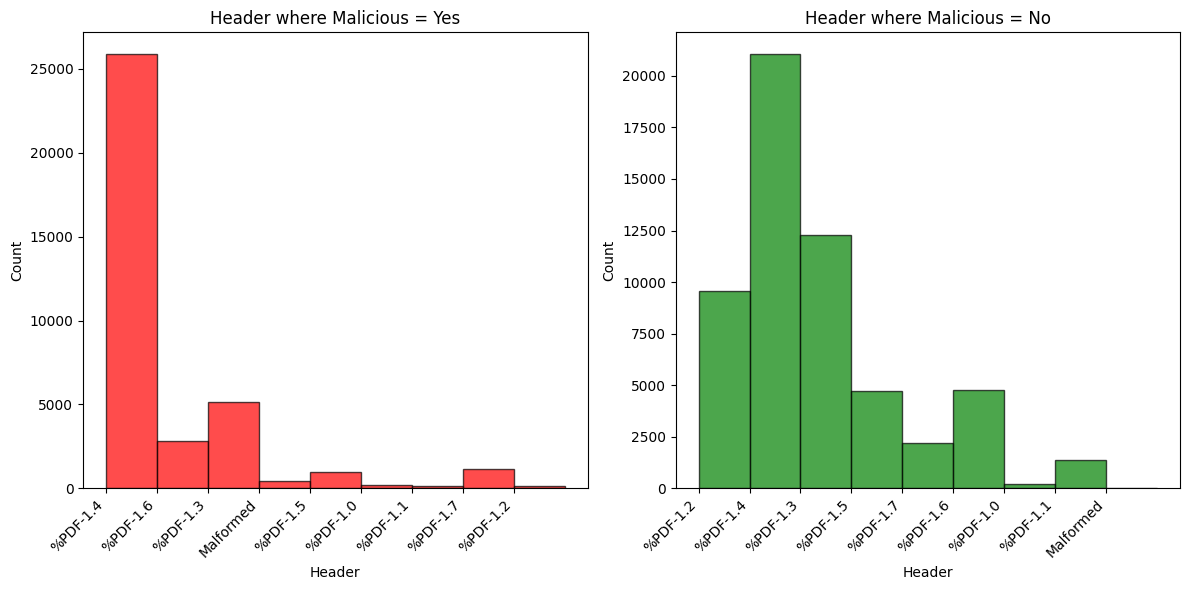

In [23]:
malicious_yes = temp[temp['Malicious'] == 'Yes']['header']
malicious_no = temp[temp['Malicious'] == 'No']['header']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(malicious_yes, bins=range(len(malicious_yes.unique())+1), color='red', edgecolor='black', alpha=0.7)
ax1.set_title('Header where Malicious = Yes')
ax1.set_xlabel('Header')
ax1.set_ylabel('Count')
ax1.set_xticklabels(malicious_yes.unique(), rotation=45, ha="right")

ax2.hist(malicious_no, bins=range(len(malicious_no.unique())+1), color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Header where Malicious = No')
ax2.set_xlabel('Header')
ax2.set_ylabel('Count')
ax2.set_xticklabels(malicious_no.unique(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [24]:
temp.columns

Index(['pdfsize', 'metadata size', 'pages', 'xref length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'contains text', 'header',
       'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref',
       'pageno', 'Encrypt', 'ObjStm', 'JS', 'JavaScript', 'AA', 'OpenAction',
       'AcroForm', 'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA',
       'URI', 'Colors', 'JS_Obfuscated', 'JavaScript_Obfuscated',
       'AA_Obfuscated', 'OpenAction_Obfuscated', 'AcroForm_Obfuscated',
       'JBIG2Decode_Obfuscated', 'RichMedia_Obfuscated', 'Launch_Obfuscated',
       'EmbeddedFile_Obfuscated', 'XFA_Obfuscated', 'pageno_Obfuscated',
       '%EOF', '/Producer', '/ProcSet', '/ID', '/S', '/CreationDate', '/Font',
       '/XObject', '/Widget', '/FontDescriptor', '/Rect', '/ModDate', '/Info',
       '/XML', 'dict_start', 'dict_end', 'comments', 'Malicious'],
      dtype='object')

## Analysis of Obfuscated Columns

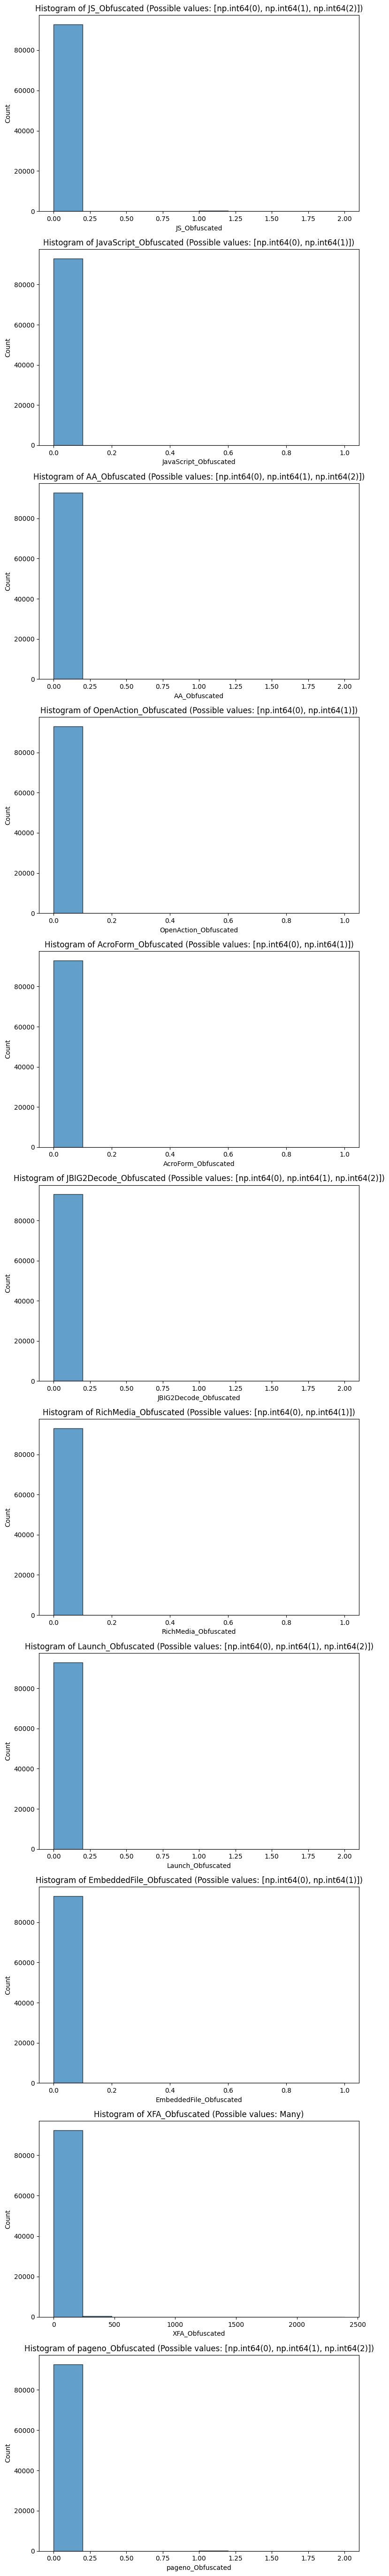

In [25]:
# Get columns that end with '_Obfuscated'
obfuscated_columns = [col for col in temp.columns if col.endswith('_Obfuscated')]

# Create a figure with subplots (one for each '_Obfuscated' column)
num_cols = len(obfuscated_columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, 5 * num_cols))

# If there's only one column, axes might not be iterable, so handle that case
if num_cols == 1:
    axes = [axes]

# Plot a histogram for each obfuscated column
for ax, col in zip(axes, obfuscated_columns):
    unique_values = temp[col].unique()
    ax.hist(temp[col], bins=10, edgecolor='black', alpha=0.7)
    
    # Set the title to include the unique values
    values = sorted(unique_values)
    if(len(values)>5):
        values = "Many"
    ax.set_title(f'Histogram of {col} (Possible values: {values})')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis of JBIG2Decode Column

In [26]:
temp['JBIG2Decode'].value_counts()

JBIG2Decode
0    92930
1       71
2        8
4        2
Name: count, dtype: int64

In [27]:
temp[temp['Malicious'] == 'Yes']['JBIG2Decode'].value_counts()

JBIG2Decode
0    36781
1       71
2        8
4        2
Name: count, dtype: int64

In [28]:
temp[temp['Malicious'] == 'No']['JBIG2Decode'].value_counts()

JBIG2Decode
0    56149
Name: count, dtype: int64

# Analysis of Colors Column

In [29]:
temp['Colors'].value_counts()

Colors
0    92555
1      451
2        5
Name: count, dtype: int64